<a href="https://colab.research.google.com/github/nephelim74/PythonDS/blob/main/DZ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 3. Практическая работа. Построение модели Линейной регрессии
В качестве датасета используется набор данных о жилищных условиях и ценах на жилье в Калифорнии (California housing dataset), доступный в библиотеках Python (например, sklearn.datasets).

Анализ и подготовка данных:

— Загрузите датасет California housing dataset.
— Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.
— Визуализируйте распределения нескольких выбранных числовых переменных и корреляции между ними.

Построение модели линейной регрессии:

— Разделите данные на обучающий и тестовый набор в соотношении 80/20.
— Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.
— Постройте модель линейной регрессии, обучите ее на обучающем наборе и сделайте предсказания на тестовом.
— Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).
— Проведите эксперименты с различными признаками, попробуйте увеличить количество признаков и сравните с базовыми метриками.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor


In [2]:
# Загрузка датасета
cal_housing = fetch_california_housing(as_frame=True)
data = cal_housing.data
target = cal_housing.target

In [3]:
# Базовый анализ данных
print("Размер выборки:", data.shape)
print("\nПропущенные значения:\n", data.isnull().sum())
print("\nСтатистический анализ числовых переменных:\n", data.describe())

Размер выборки: (20640, 8)

Пропущенные значения:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Статистический анализ числовых переменных:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
c

* count: Количество наблюдений (строк) для каждой переменной. Здесь во всех переменных 20640 наблюдений, что говорит об отсутствии пропущенных значений в этих столбцах (хотя это нужно дополнительно проверить, как это было сделано в предыдущем коде с помощью `.isnull().sum()`).

* mean: Среднее значение переменной. Например, средний доход (`MedInc`) составляет 3.87, средний возраст домов (`HouseAge`) — 28.64 лет.

* std: Стандартное отклонение. Показатель разброса данных вокруг среднего значения. Большое стандартное отклонение указывает на высокую изменчивость данных. Например, `Population` имеет высокое стандартное отклонение (1132), что говорит о большом разбросе численности населения в разных районах.


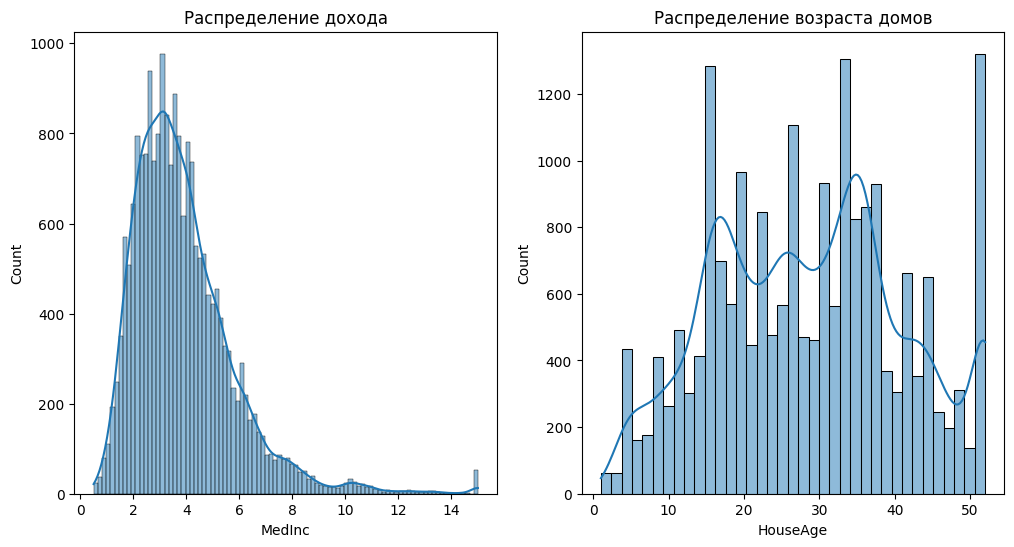

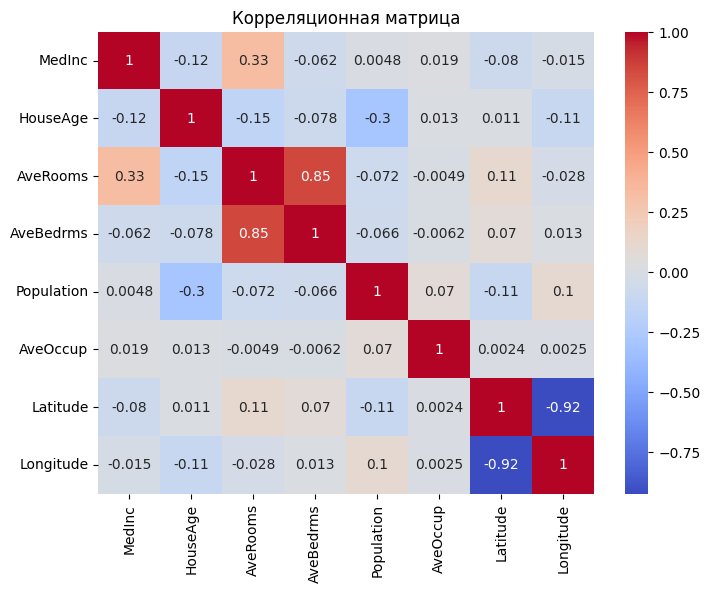

In [4]:
# Визуализация распределений и корреляций
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['MedInc'], kde=True)
plt.title('Распределение дохода')
plt.subplot(1, 2, 2)
sns.histplot(data['HouseAge'], kde=True)
plt.title('Распределение возраста домов')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


In [15]:
# Построение модели линейной регрессии с двумя переменными
# Выбираем 'MedInc' (медианный доход) и 'AveRooms'(среднее количество комнат в доме) в качестве признаков.
# Обоснование: Медианный доход сильно коррелирует с ценой, а возраст домов может влиять на стоимость.
X = data[['MedInc', 'AveRooms']]
y = target

In [16]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Масштабирование данных (для повышения точности модели)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

In [24]:
# Оценка качества модели
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nМетрики качества модели (2 признака):")
print(f"R^2(R-квадрат, коэффициент детерминации): {r2:.3f}")
print(f"MSE(Mean Squared Error, среднеквадратичная ошибка): {mse:.3f}")
print(f"MAE(Mean Absolute Error, средняя абсолютная ошибка): {mae:.3f}")


Метрики качества модели (2 признака):
R^2(R-квадрат, коэффициент детерминации): 0.464
MSE(Mean Squared Error, среднеквадратичная ошибка): 0.702
MAE(Mean Absolute Error, средняя абсолютная ошибка): 0.625


In [25]:
# Эксперименты с большим количеством признаков
X_all = data
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)
scaler_all = StandardScaler()
X_train_all = scaler_all.fit_transform(X_train_all)
X_test_all = scaler_all.transform(X_test_all)

model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)
y_pred_all = model_all.predict(X_test_all)

r2_all = r2_score(y_test_all, y_pred_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)
mae_all = mean_absolute_error(y_test_all, y_pred_all)

print(f"\nМетрики качества модели (все признаки):")
print(f"R^2(R-квадрат, коэффициент детерминации): {r2_all:.3f}")
print(f"MSE(Mean Squared Error, среднеквадратичная ошибка): {mse_all:.3f}")
print(f"MAE(Mean Absolute Error, средняя абсолютная ошибка): {mae_all:.3f}")


Метрики качества модели (все признаки):
R^2(R-квадрат, коэффициент детерминации): 0.576
MSE(Mean Squared Error, среднеквадратичная ошибка): 0.556
MAE(Mean Absolute Error, средняя абсолютная ошибка): 0.533


In [26]:


# Построение модели MLPRegressor с использованием всех признаков
X_all = data
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

scaler_all = StandardScaler()
X_train_all = scaler_all.fit_transform(X_train_all)
X_test_all = scaler_all.transform(X_test_all)

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42) # Настройка гиперпараметров
mlp_model.fit(X_train_all, y_train_all)
y_pred_mlp = mlp_model.predict(X_test_all)


r2_mlp = r2_score(y_test_all, y_pred_mlp)
mse_mlp = mean_squared_error(y_test_all, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test_all, y_pred_mlp)


print(f"\nМетрики качества модели MLPRegressor (все признаки):")
print(f"R^2(R-квадрат, коэффициент детерминации): {r2_mlp:.3f}")
print(f"MSE(Mean Squared Error, среднеквадратичная ошибка): {mse_mlp:.3f}")
print(f"MAE(Mean Absolute Error, средняя абсолютная ошибка): {mae_mlp:.3f}")


Метрики качества модели MLPRegressor (все признаки):
R^2(R-квадрат, коэффициент детерминации): 0.793
MSE(Mean Squared Error, среднеквадратичная ошибка): 0.271
MAE(Mean Absolute Error, средняя абсолютная ошибка): 0.352


### Результаты показывают, что использование всех признаков и, особенно, применение модели MLPRegressor существенно улучшают качество прогнозирования цен на жилье по сравнению с моделью линейной регрессии, использующей только два признака. Разберем подробнее:

* Линейная регрессия с двумя признаками (MedInc и AveRooms): R² = 0.464 означает, что модель объясняет только 46.4% вариации цен на жилье. MSE (0.702) и MAE (0.625) указывают на значительные ошибки предсказания. Это ожидаемо, поскольку мы используем только два признака, игнорируя потенциально важную информацию, содержащуюся в других переменных.

* Линейная регрессия со всеми признаками: R² увеличился до 0.576, MSE снизилось до 0.556, а MAE до 0.533. Это говорит о значительном улучшении модели. Использование всех признаков позволяет ей захватить более сложные взаимосвязи между переменными, что приводит к лучшему прогнозу.

* MLPRegressor со всеми признаками: Это модель показала наилучшие результаты: R² = 0.793, MSE = 0.271, MAE = 0.352. Значительно более высокий R² указывает на то, что модель объясняет гораздо большую часть вариации цен на жилье (79.3%). MSE и MAE тоже значительно ниже, чем у линейной регрессии, свидетельствуя о меньших ошибках прогнозирования. Это обусловлено способностью MLPRegressor моделировать нелинейные зависимости между признаками и ценой, чего линейная регрессия сделать не может.

### Вывод:

Модель MLPRegressor с использованием всех признаков является наиболее эффективной для прогнозирования цен на жилье в данном наборе данных. Линейная регрессия, особенно с ограниченным количеством признаков, дает значительно менее точные прогнозы. Этот результат подчеркивает важность выбора подходящей модели и использования всего доступного объема информации для построения точных прогнозных моделей. Однако, не стоит забывать про возможную переобученность модели MLPRegressor. В идеале, нужно проверить её качество на независимом тестовом наборе данных, которого у нас нет в данном примере.